In [1]:
# 导入数据处理包
import pandas as pd

In [2]:
# 读取候选人信息，原数据基础上增加表头信息
candidates = pd.read_csv("weball20.txt", sep='|',names=["CAND_ID","CAND_NAME","CAND_ICI","PTY_CD",
                                                        "CAND_PTY_AFFILIATION","TTL_RECEIPTS",
                                                        "TRANS_FROM_AUTH","TTL_DISB","TRANS_TO_AUTH",
                                                       "COH_BOP","COH_COP","CAND_CONTRIB","CAND_LOANS",
                                                       "OTHER_LOANS","CAND_LOAN_REPAY","OTHER_LOAN_REPAY",
                                                       "DEBTS_OWED_BY","TTL_INDIV_CONTRIB","CAND_OFFICE_ST",
                                                       "CAND_OFFICE_DISTRICT","SPEC_ELECTION","PRIM_ELECTION",
                                                       "RUN_ELECTION","GEN_ELECTION","GEN_ELECTION_PRECENT",
                                                       "OTHER_POL_CMTE_CONTRIB","POL_PTY_CONTRIB","CVG_END_DT",
                                                       "INDIV_REFUNDS","CMTE_REFUNDS"])

# 读取候选人和委员会的联系信息，原数据基础上增加表头信息
ccl = pd.read_csv("ccl.txt",sep='|',names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP',
                                           'CMTE_DSGN','LINKAGE_ID'])

In [3]:
# 关联两个表数据
ccl = pd.merge(ccl,candidates)

# 提取需要的列
ccl = pd.DataFrame(ccl, columns=[ 'CMTE_ID','CAND_ID', 'CAND_NAME','CAND_PTY_AFFILIATION'])

数据字段说明：

- CMTE_ID：委员会ID
- CAND_ID：候选人ID
- CAND_NAME：候选人姓名
- CAND_PTY_AFFILIATION：候选人党派

In [4]:
# 查看目前数据前10行
ccl.head(10)

,CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00697789,H0AL01055,"CARL, JERRY LEE, JR",REP
1,C00701557,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP
2,C00701409,H0AL01071,"PRINGLE, CHRISTOPHER PAUL",REP
3,C00703066,H0AL01089,"HIGHTOWER, BILL",REP
4,C00708867,H0AL01097,"AVERHART, JAMES",DEM
5,C00710947,H0AL01105,"GARDNER, KIANI A",DEM
6,C00722512,H0AL01121,"CASTORANI, JOHN",REP
7,C00725069,H0AL01139,"COLLINS, FREDERICK G. RICK'",DEM
8,C00462143,H0AL02087,"ROBY, MARTHA",REP
9,C00493783,H0AL02087,"ROBY, MARTHA",REP


In [5]:
# 读取个人捐赠数据，原数据基础上增加表头信息
itcont = pd.read_csv("itcont_2020_20200722_20200820.txt",sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',
                                                                                  'IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
                                                                                  'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
                                                                                  'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD',
                                                                                  'MEMO_TEXT','SUB_ID'])

/var/folders/hd/h9xy8gzx29j27692hnj8b9xh0000gn/T/ipykernel_71380/655536950.py:2: DtypeWarning: Columns (10,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  itcont = pd.read_csv("itcont_2020_20200722_20200820.txt",sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',


In [7]:
# 将候选人与委员会关系表ccl和个人捐赠表itcont合并，CMTE_ID
c_itcont = pd.merge(ccl,itcont)

# 提取需要的列
c_itcont = pd.DataFrame(c_itcont, columns=[ 'CAND_NAME','NAME', 'STATE','EMPLOYER','OCCUPATION',
                                           'TRANSACTION_AMT', 'TRANSACTION_DT','CAND_PTY_AFFILIATION'])

**数据说明**
- CAND_NAME – 接受捐赠的候选人姓名
- NAME – 捐赠人姓名
- STATE – 捐赠人所在州
- EMPLOYER – 捐赠人所在公司
- OCCUPATION – 捐赠人职业
- TRANSACTION_AMT – 捐赠数额（美元）
- TRANSACTION_DT – 收到捐款的日期
- CAND_PTY_AFFILIATION – 候选人党派

In [8]:
# 查看目前数据前10行
c_itcont.head(10)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020,REP
3,"WOOD, DANIEL","HOPKINS, RICHARD",AZ,POWERS-LEAVITT,INSURANCE AGENT,300,8102020,REP
4,"WOOD, DANIEL","PENDLETON, DIANE",AZ,UNEMPLOYED,NaN,500,8072020,REP
5,"WOOD, DANIEL","PREVATT, WILLIAM",AZ,SELF-EMPLOYED,DVM,500,7312020,REP
6,"WOOD, DANIEL","HARDING, DOUG",AZ,MICROSURE,OPERATIONS MANAGER,2800,8102020,REP
7,"WOOD, DANIEL","HARDING, MARI",AZ,NaN,NaN,1400,8152020,REP
8,"WOOD, DANIEL","HEDGER, CYNTHIA",TX,NaN,NaN,200,7312020,REP
9,"HUANG, PEGGY","HUANG - PERSONAL FUNDS, PEGGY",CA,OFFICE OF THE ATTORNEY GENERAL,DEPUTY ATTORNEY GENERAL,2600,7252020,REP


### 数据探索与清洗

经过数据处理部分，我们获得了可用的数据集，现在我们可以利用调用shape属性查看数据的规模，调用info函数查看数据信息，调用describe函数查看数据分布。

In [9]:
# 查看数据规模
c_itcont.shape

(756205, 8)

In [10]:
# 查看整体数据信息，包括每个字段的名称，非空数量，字段的数据类型
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756160 non-null  object
 3   EMPLOYER              737413 non-null  object
 4   OCCUPATION            741294 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  int64 
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(2), object(6)
memory usage: 51.9+ MB


通过上面的探索我们知道目前数据集的一些基本情况，目前数据总共有756205行，8列，总占用内存51.9+MB，STATE、EMPLOYER、OCCUPATION有缺失值，另外日期列目前为int64类型，需要进行转换为str类型。

In [11]:
# 空值处理，统一填充：NOT PROVIDE
c_itcont['STATE'].fillna("NOT PROVIDE", inplace=True)
c_itcont['EMPLOYER'].fillna("NOT PROVIDE", inplace=True)
c_itcont['OCCUPATION'].fillna("NOT PROVIDE", inplace=True)

In [12]:
# 对日期TRANSACTION_DT列进行处理
c_itcont['TRANSACTION_DT'] = c_itcont['TRANSACTION_DT'].astype(str)

# 将日期格式改为年月日  7242020
c_itcont['TRANSACTION_DT'] = [i[3:7]+i[0]+i[1:3] for i in c_itcont['TRANSACTION_DT'] ]

In [13]:
# 再次查看数据信息
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756205 non-null  object
 3   EMPLOYER              756205 non-null  object
 4   OCCUPATION            756205 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  object
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(1), object(7)
memory usage: 51.9+ MB


In [14]:
# 查看数据前3行
c_itcont.head(3)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,2020724,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020724,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020731,REP


In [16]:
# 查看数据表中数据类型的列的数据分布情况
c_itcont.describe()

,TRANSACTION_AMT
count,7.562050e+05
mean,1.504307e+02
std,2.320452e+03
min,-5.600000e+03
25%,2.000000e+01
50%,3.500000e+01
75%,1.000000e+02
max,1.500000e+06


In [17]:
# 查看单列的数据发布情况
c_itcont['CAND_NAME'].describe()

count                 756205
unique                   312
top       BIDEN, JOSEPH R JR
freq                  507816
Name: CAND_NAME, dtype: object

In [19]:
# 计算每个党派的所获得的捐款总额，然后排序，取前十位
c_itcont.groupby("CAND_PTY_AFFILIATION").sum(numeric_only=True).sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
CAND_PTY_AFFILIATION,
DEM,75961730
REP,37170653
IND,328802
LIB,169202
DFL,76825
GRE,18607
NON,11256
UNK,10195
CON,4117


In [20]:
# 计算每个总统候选人所获得的捐款总额，然后排序，取前十位
c_itcont.groupby("CAND_NAME").sum(numeric_only=True).sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
CAND_NAME,
"BIDEN, JOSEPH R JR",68111142
"TRUMP, DONALD J.",16594982
"SULLIVAN, DAN",9912465
"JACOBS, CHRISTOPHER L.",6939209
"BLOOMBERG, MICHAEL R.",3451916
"MARKEY, EDWARD J. SEN.",606832
"SHAHEEN, JEANNE",505446
"KENNEDY, JOSEPH P III",467738
"CORNYN, JOHN SEN",345959


获得捐赠最多的党派有DEM(民主党)、REP(共和党)，分别对应BIDEN, JOSEPH R JR(拜登)和TRUMP, DONALD J.(特朗普)，从我们目前分析的2020.7.22-2020.8.20这一个月的数据来看，在选民的捐赠数据中拜登代表的民主党完胜特朗普代表的共和党，由于完整数据量过大，所以没有对所有数据进行汇总分析，因此也不能确定11月大选公布结果就一定是拜登当选

In [21]:
# 查看不同职业的人捐款的总额，然后排序，取前十位
c_itcont.groupby('OCCUPATION').sum(numeric_only=True).sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
OCCUPATION,
NOT EMPLOYED,24436214
RETIRED,18669950
NOT PROVIDE,5086555
ATTORNEY,4443569
FOUNDER,3519109
PHYSICIAN,3295595
CONSULTANT,1647033
LAWYER,1565976
PROFESSOR,1481260


In [22]:
# 查看每个职业捐款人的数量
c_itcont['OCCUPATION'].value_counts().head(10)

NOT EMPLOYED    224109
RETIRED         151834
ATTORNEY         19666
NOT PROVIDE      14911
PHYSICIAN        14033
CONSULTANT        8333
PROFESSOR         8022
TEACHER           8013
ENGINEER          7922
SALES             6435
Name: OCCUPATION, dtype: int64

从捐款人的职业这个角度分析，我们会发现NOT EMPLOYED(自由职业)的总捐赠额是最多，通过查看每个职业捐赠的人数来看，我们就会发现是因为NOT EMPLOYED(自由职业)人数多的原因，另外退休人员捐款人数也特别多，所以捐款总数对应的也多，其他比如像：律师、创始人、医生、顾问、教授、主管这些高薪人才虽然捐款总人数少，但是捐款总金额也占据了很大比例。

In [23]:
# 每个州获捐款的总额，然后排序，取前五位
c_itcont.groupby('STATE').sum(numeric_only=True).sort_values("TRANSACTION_AMT",ascending=False).head(5)

,TRANSACTION_AMT
STATE,
CA,19999115
NY,11468537
FL,8128789
TX,8101871
MA,5187957


In [24]:
# 查看每个州捐款人的数量
c_itcont['STATE'].value_counts().head(5)

CA    127895
TX     54457
FL     54343
NY     49453
MA     29314
Name: STATE, dtype: int64

最后查看每个州的捐款总金额，我们会发现CA(加利福利亚)、NY(纽约)、FL(弗罗里达)这几个州的捐款是最多的，在捐款人数上也是在Top端，另一方面也凸显出这些州的经济水平发达。 

### 数据可视化

In [25]:
# 导入matplotlib中的pyplot
import matplotlib.pyplot as plt

# 为了使matplotlib图形能够内联显示
%matplotlib inline

# 导入词云库
from wordcloud import WordCloud,ImageColorGenerator

#### 4.1 按州总捐款数和总捐款人数柱状图

<Axes: xlabel='STATE'>

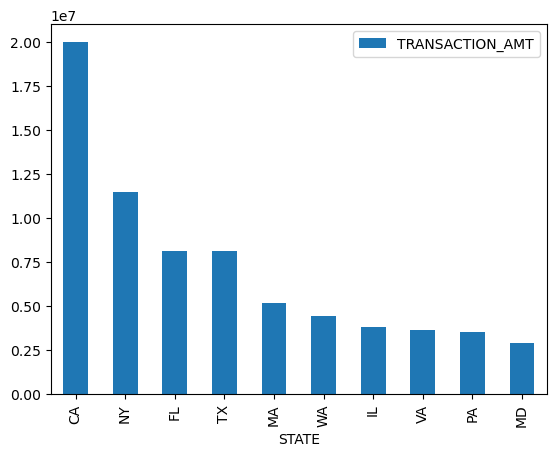

In [27]:
# 各州总捐款数可视化
st_amt = c_itcont.groupby('STATE').sum(numeric_only=True).sort_values("TRANSACTION_AMT",ascending=False)[:10]
st_amt= pd.DataFrame(st_amt, columns=['TRANSACTION_AMT'])
st_amt.plot(kind='bar')

#### 4.2 各州捐款总人数可视化

<Axes: xlabel='STATE'>

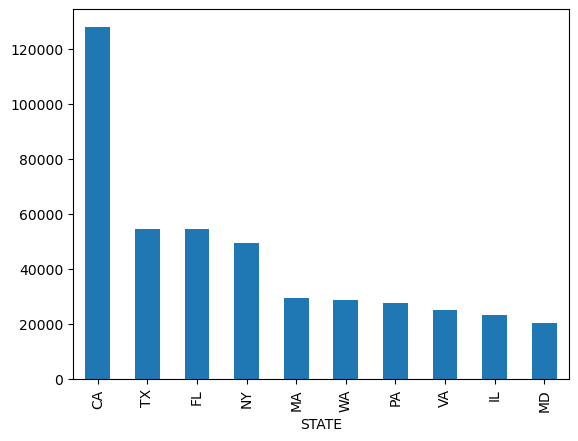

In [28]:
st_amt = c_itcont.groupby('STATE').size().sort_values(ascending=False).head(10)
st_amt.plot(kind='bar')

 #### 4.3 热门候选人拜登在各州的获得的捐赠占比

array([<Axes: ylabel='TRANSACTION_AMT'>], dtype=object)

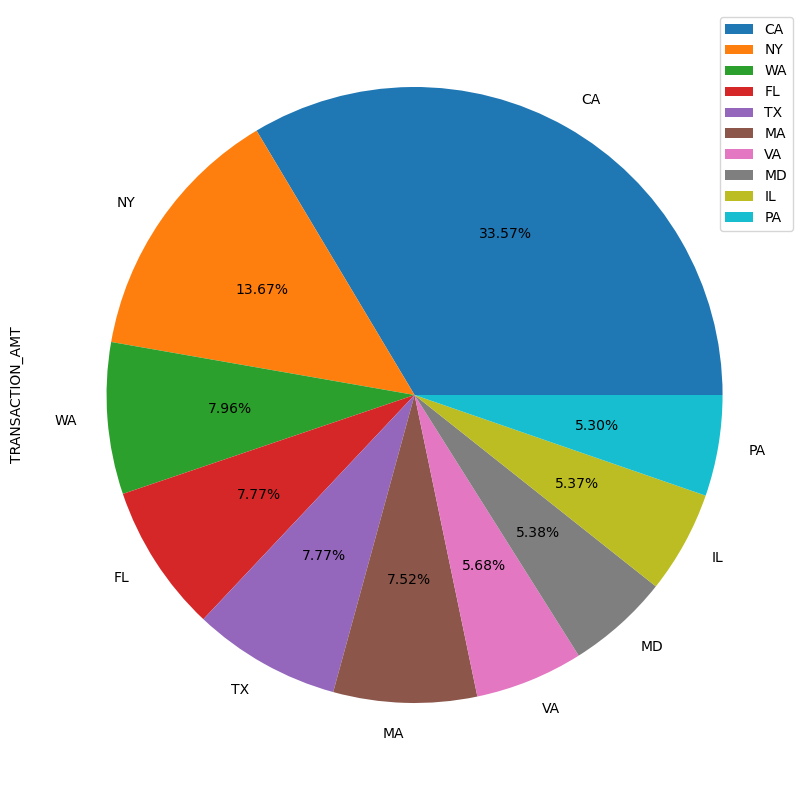

In [29]:
# 从所有数据中取出支持拜登的数据
biden = c_itcont[c_itcont['CAND_NAME']=='BIDEN, JOSEPH R JR']
# 统计各州对拜登的捐款总数
biden_state = biden.groupby('STATE').sum(numeric_only=True).sort_values("TRANSACTION_AMT", ascending=False).head(10)
# 饼图可视化各州捐款数据占比
biden_state.plot.pie(figsize=(10, 10),autopct='%0.2f%%',subplots=True)